---
title: Light
date: 2025-01-12
authors:
  - name: Professor Craig Cahillane
    orcid: 0000-0002-3888-314X
    affiliations:
      - Syracuse University
numbering:
  heading_1: true
  heading_2: true
  heading_3: true
---

In [1]:
#| "tags": [ "hide-input",]
%matplotlib widget
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import *

plt.style.use('dark_background')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": False,
        "figure.figsize": (9, 6),
        # "figure.autolayout": True,
        # "font.family": "serif",
        # "font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

# Readings
[Wikipedia article on Maxwell's Equations, Solutions in a Vacuum](https://en.wikipedia.org/wiki/Maxwell%27s_equations#Vacuum_equations,_electromagnetic_waves_and_speed_of_light)

# <span style="color: #ffff00">What is light?</span>

If we are to understand lasers and optomechanics, we must first have a solid grasp of the the nature of light.
*What is light?* is a simple question without a simple answer.

Loosely, *light* is an excitation in the electromagnetic field which permeates the universe, carrying energy and information that can be directly sensed by the human eye.
Humanity's close relationship with light drove us to study it closely, teaching us first the secrets of electromagnetism, 
then plunging us into the unintuitive world of quantum mechanics.

## The Duality of Light
Light is commonly described to be both an *electromagnetic wave* and *particle*.
This is our way of relating light to waves and particles, 
two objects humans can easily understand, 
and sweeping under the rug the complexities.
In reality, light is neither a wave nor a particle, but describing light as a complex traveling oscillation in the electromagnetic wave with indeterminant wavelength is not very useful for most people.  

A good intuition can be provided by seeing the *wave view* vs *photon view* shown in this interactive demo:
[Electromagnetic Spectrum](https://applets.kcvs.ca/ElectromagneticSpectrum/electromagneticSpectrum.html).


## Electromagnetism: The Wave Equation
Maxwell showed that light was an *electromagnetic wave*, resulting from the interplay of his famous equations in a vacuum (no charges or currents):
\begin{align}
\label{eq:maxwell_efield_dot}
\nabla \cdot \boldsymbol{E} &= 0
\end{align}

\begin{align}
\label{eq:maxwell_bfield_dot}
\nabla \cdot \boldsymbol{B} &= 0
\end{align}

\begin{align}
\label{eq:maxwell_efield}
\nabla \times \boldsymbol{E} &= - \dfrac{\partial \boldsymbol{B}}{\partial t}
\end{align}

\begin{align}
\label{eq:maxwell_bfield}
\nabla \times \boldsymbol{B} &= \dfrac{1}{c^2} \dfrac{\partial \boldsymbol{E}}{\partial t}
\end{align}
where $\boldsymbol{E}$ is the electric field vector, 
$\boldsymbol{B}$ is the magnetic field vector,
$\nabla \times$ is a spatial cross-product partial derivative, or *curl* operator familiar from undergrad E\&M,
and $c$ is the speed of light.

If we take the curl of the equations in [](#eq:maxwell_efield):
\begin{align}
\label{eq:curl_maxwell}
\nabla \times \nabla \times \boldsymbol{E} &= \nabla \times \left(- \dfrac{\partial \boldsymbol{B}}{\partial t}\right)\\
&= - \dfrac{\partial}{\partial t} \left(\nabla \times \boldsymbol{B} \right)
\end{align}
Subbing in Eq. [](#eq:maxwell_bfield) to the right hand side, and using the [curl-of-curl identity](https://en.wikipedia.org/wiki/Vector_calculus_identities#Curl_of_curl) 
$$\nabla \times \nabla \times \boldsymbol{E} = \nabla (\nabla \cdot \boldsymbol{E}) - \nabla^2 \boldsymbol{E}$$ 
plus Eq. [](#eq:maxwell_efield_dot) yields
\begin{align}
\label{eq:efield_wave}
\nabla^2 \boldsymbol{E} = \dfrac{1}{c^2} \dfrac{\partial^2 \boldsymbol{E} }{\partial t^2}
\end{align}

\begin{align}
\label{eq:bfield_wave}
\nabla^2 \boldsymbol{B} = \dfrac{1}{c^2} \dfrac{\partial^2 \boldsymbol{B} }{\partial t^2}
\end{align}


## <span style="color: #ff5500">One-dimensional Plane-wave solution to the wave equation</span>
We are going to solve this differential equation in the classic way: [by already knowing the answer](https://en.wikipedia.org/wiki/Wave_equation#Plane-wave_eigenmodes).
This equation is [Helmholtz's equation](https://en.wikipedia.org/wiki/Helmholtz_equation).

First, we'll solve Eqs. [](#eq:efield_wave) and [](#eq:bfield_wave) in one dimension, and focus on the electric field at first.
We can break up electric field 
\begin{align}
\label{eq:efield_breakdown}
\boldsymbol{E} = (E_x, E_y, E_z)
\end{align}
Recall that the Laplacian 
$$\nabla^2 = \left(\dfrac{\partial^2}{\partial x^2}, \dfrac{\partial^2}{\partial y^2}, \dfrac{\partial^2}{\partial z^2}\right)$$

From Gauss's Law in a vacuum $\nabla \cdot \boldsymbol{E} = 0$, 
we know that an electric field cannot propogate in the direction it is pointing. 
The wave must propogate in a transverse direction.

We will solve for an electric-field in the $x$-direction $E_x$ that is propogating in the $z$-direction:
\begin{align}
\label{eq:efield_wave2}
\dfrac{\partial^2 E_x}{\partial z^2} = \dfrac{1}{c^2} \dfrac{\partial^2 E_x }{\partial t^2}
\end{align}

We'll first employ *separation of variables*.  
We'll separate the solution for $E_x$ into a pure time and spatial component: 
\begin{align}
\label{eq:separation}
E_x(z,t) = Z(z) T(t)
\end{align}

Applying this separated function
\begin{align}
\label{eq:efield_wave3}
\dfrac{\partial^2 Z}{\partial z^2} T(t) = \dfrac{1}{c^2} \dfrac{\partial^2 T }{\partial t^2} Z(z)
\end{align}
Rearranging: 
\begin{align}
\label{eq:efield_wave4}
\dfrac{1}{Z} \dfrac{\partial^2 Z}{\partial z^2} = \dfrac{1}{c^2} \dfrac{1}{T} \dfrac{\partial^2 T }{\partial t^2}
\end{align}

Both sides of Eq. [](#eq:efield_wave4) are independent ordinary differential equations, and will equal the same constant.  
For convenience later, we will call this constant $-k^2$.  
Then we have
\begin{align}
\label{eq:efield_wave5}
\dfrac{1}{Z} \dfrac{\partial^2 Z}{\partial z^2} = -k^2
\end{align}
\begin{align}
\label{eq:efield_wave6}
\dfrac{1}{c^2} \dfrac{1}{T} \dfrac{\partial^2 T }{\partial t^2} = -k^2
\end{align}


We can then offer two oscillating solutions for Eq. [](#eq:efield_wave5):
\begin{align}
\label{eq:z-solution}
Z(z) = e^{i k z}, \qquad Z(z) = e^{-i k z}
\end{align}
Similarly for Eq. [](#eq:efield_wave6), but we define a new constant $\omega = k c$ for simplicity:
\begin{align}
\label{eq:t-solution}
T(t) = e^{i \omega t}, \qquad T(t) = e^{-i \omega t}
\end{align}


Combining the above solutions back together using [](#eq:separation) gives us the following general solution:
\begin{align}
\label{eq:general_solution}
E_x(z,t) = &A e^{i (k z - \omega t)} + B e^{i (-k z - \omega t)}\\
           &C e^{i (k z + \omega t)} + D e^{i (-k z + \omega t)} 
\end{align}
with complex coefficients $A,B,C,D$.
The constant $k$ is the *wave-number* in units of inverse meters,\
while the constant $\omega$ is the *angular frequency* in units of radians / second.

Eq.[](#eq:general_solution) is generally complex-valued.  
However, an electric field must take on a real value, as it is an observable quantity.
To reconcile that, our coefficients $A,B,C,D$ must conspire to make $E_x$ real in the end.
Most simply, one could set $D = A^*$ and $C = B^*$, and we'd instantly have
\begin{align}
\label{eq:general_solution2}
E_x(z,t) = &A' \cos(k z - \omega t + \phi_+) + B' \cos(-k z - \omega t + \phi_-)\\~\\
E_x(z,t) = &\underbrace{A' \cos(k z - \omega t + \phi_+)}_{+z~\text{traveling field}} + \underbrace{B' \cos(k z + \omega t - \phi_-)}_{-z~\text{traveling field}}
\end{align}
where I've assumed the factor of 1/2 into some new $A'$ and $B'$ coefficients, 
as well as some phases from the complex angles $\phi_{+}$ and $\phi_{-}$.
Because cosine is an even function, we are able to write $\cos(-k z - \omega t) = \cos(k z + \omega t)$ in the second line.
In this case, $A'$ and $B'$ would be real-valued to maintain a real electric field.

The two components of the $E_x$ solution represent one field propogating in the positive $z$-direction,
and the other field propogating in the negative $z$-direction.

We mention here that these cosine wave solutions are not the only solutions, but they can be summed into any solution that depends on a variable $u = k z - \omega t$.
See [Feynman's Lecture on Physics Volume II Chapter 20](https://www.feynmanlectures.caltech.edu/II_20.html), or [Griffith's Electrodynamics Chapter 9.1.1](https://www.hlevkin.com/hlevkin/90MathPhysBioBooks/Physics/Physics/Electrodynamics/David%20J.%20Griffiths%20-%20Introduction%20to%20Electrodynamics-Prentice%20Hall%20(1999).pdf).


interactive(children=(FloatSlider(value=0.0, description='time [s]:', max=1.0, readout_format='.3f', step=0.01…

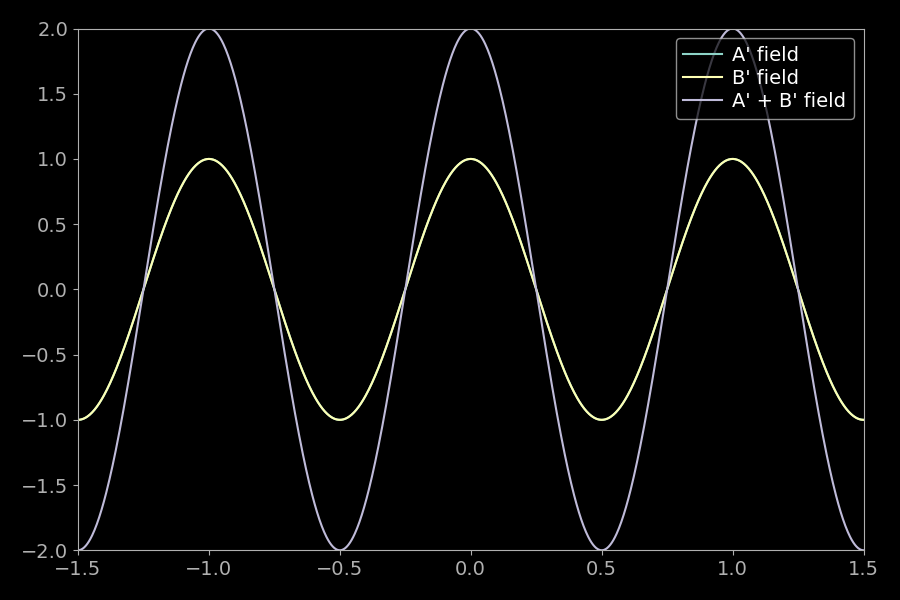

In [2]:
#| label: fig:standing_wave
#| "tags": [ "hide-input",]
fig = plt.figure()
ax = fig.add_subplot()

amp1 = 1.0
amp2 = 1.0
phase1 = 0.0
phase2 = 0.0
kk = 2 * np.pi * 1
omega = 2 * np.pi * 1
time = 0 

xx = np.linspace(-1.5, 1.5, 1000)
y1 = amp1 * np.cos(kk * xx - omega * time + phase1)
y2 = amp2 * np.cos(kk * xx + omega * time - phase2)
y3 = y1 + y2

eline1, = ax.plot(xx, y1, label="A' field")
eline2, = ax.plot(xx, y2, label="B' field")
eline3, = ax.plot(xx, y3, label="A' + B' field")

ax.set_xlim([xx[0], xx[-1]])
ax.set_ylim([-2, 2])

ax.legend(loc="upper right")
# ax.set_axis_off()
plt.tight_layout()

def update_standing_waves(
    time_slider_value=0, 
    amp1_slider_value=amp1,
    amp2_slider_value=amp2,
    phase1_slider_value=phase1,
    phase2_slider_value=phase2,
):
    """
    Create waves plot with synchronized cosine and sine displays.
    """
    time = time_slider_value
    amp1 = amp1_slider_value
    amp2 = amp2_slider_value
    phase1 = phase1_slider_value
    phase2 = phase2_slider_value
    
    # Calculate sine
    newy1 = amp1 * np.cos(kk * xx - omega * time + phase1)
    newy2 = amp2 * np.cos(kk * xx + omega * time - phase2)
    newy3 = newy1 + newy2

    eline1.set_ydata(newy1)
    eline2.set_ydata(newy2)
    eline3.set_ydata(newy3)
    
    fig.canvas.draw_idle()
    return

# Create interactive widget
time_slider = FloatSlider(
    value=0,
    min=0,
    max=1,
    step=0.01,
    description='time [s]:',
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
amp1_slider = FloatSlider(
    value=amp1,
    min=0,
    max=1,
    step=0.01,
    description="A':",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
amp2_slider = FloatSlider(
    value=amp2,
    min=0,
    max=1,
    step=0.01,
    description="B':",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
phase1_slider = FloatSlider(
    value=phase1,
    min=-np.pi,
    max=np.pi,
    step=0.01,
    description=r"$\phi_+$:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
phase2_slider = FloatSlider(
    value=phase2,
    min=-np.pi,
    max=np.pi,
    step=0.01,
    description=r"$\phi_-$:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)


interact(
    update_standing_waves, 
    time_slider_value=time_slider, 
    amp1_slider_value=amp1_slider,
    amp2_slider_value=amp2_slider,
    phase1_slider_value=phase1_slider,
    phase2_slider_value=phase2_slider
)
plt.show()

### <span style="color: #ff5500">Accompanying Magnetic Field Plane-Wave Solution</span>

To get the magnetic field that accompanies Eq. [](#eq:general_solution2), we go back to Faraday's Law $\nabla \times \boldsymbol{E} = - \dfrac{\partial \boldsymbol{B}}{\partial t}$.

For $\nabla \times \boldsymbol{E}$ we have (assuming $E_y$ and $E_z = 0$, and $\phi_+ = \phi_- = 0$):
\begin{align}
\label{eq:curl_of_solution}
\nabla \times \boldsymbol{E} &= 
\begin{vmatrix}
\boldsymbol{\hat{x}} & \boldsymbol{\hat{y}} & \boldsymbol{\hat{z}}\\[6pt]
\dfrac{\partial}{\partial x} & \dfrac{\partial}{\partial y} & \dfrac{\partial}{\partial z} \\[12pt]
E_x & E_y & E_z
\end{vmatrix} \\
&= \left( \boldsymbol{\hat{y}} \dfrac{\partial}{\partial z} - \boldsymbol{\hat{z}} \dfrac{\partial}{\partial y} \right) E_x\\[1em]
&= - \boldsymbol{\hat{y}} k \Big[ A' \sin(k z - \omega t) + B' \sin(k z + \omega t) \Big]
\end{align}

The above must equal $- \dfrac{\partial \boldsymbol{B}}{\partial t}$, so we take the antiderivative with respect to time to recover the magnetic field $\boldsymbol{B}$:
\begin{align}
\label{eq:magnetic_field}
- \dfrac{\partial \boldsymbol{B}}{\partial t} &= - \boldsymbol{\hat{y}} k \Big[ A' \sin(k z - \omega t) + B' \sin(k z + \omega t) \Big]\\
\boldsymbol{B} &= \boldsymbol{\hat{y}} k \Bigg[ \dfrac{1}{\omega} A' \cos(k z - \omega t) - \dfrac{1}{\omega} B' \cos(k z + \omega t) \Bigg]\\
\rightarrow B_y &= \dfrac{k}{\omega} \Big[ A' \cos(k z - \omega t) - B' \cos(k z + \omega t) \Big]
\end{align}

The below [Figure](#fig:three_d_wave) shows the electric field alongside the magnetic field, propogating only in one direction.


interactive(children=(FloatSlider(value=0.0, description='time [s]:', max=3.0, readout_format='.3f', step=0.01…

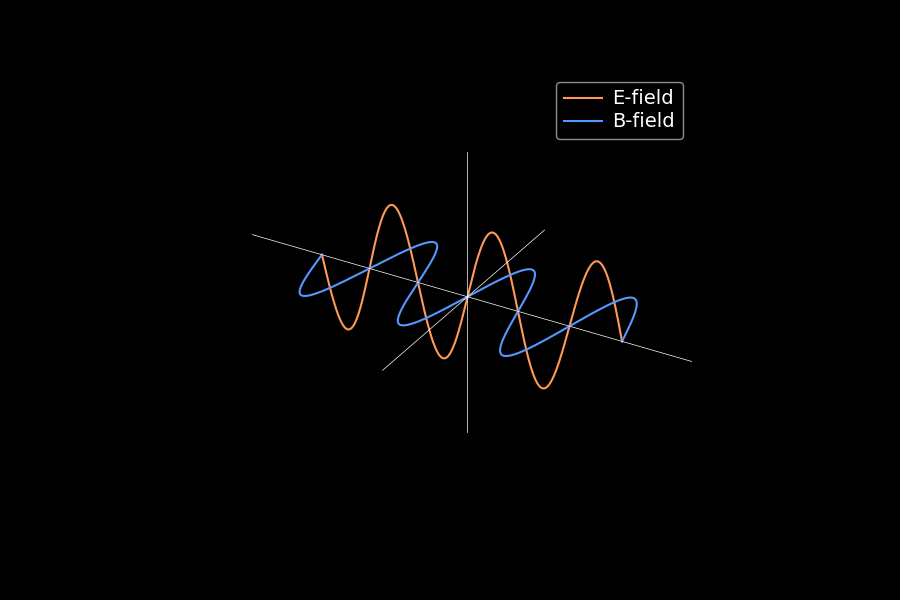

In [3]:
#| label: fig:three_d_wave
#| "tags": [ "hide-input",]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

amp = 0.7
kk = 2 * np.pi * 1
omega = 2 * np.pi * 1
time = 0 
x = np.linspace(-1.5, 1.5, 1000)
y = amp * np.sin(kk * x - omega * time)
z = np.zeros_like(x)

eline, = ax.plot(x, z, y, color="#ff9955", label="E-field")
bline, = ax.plot(x, y, z, color="#5599ff", label="B-field")

ax.plot(1.5*x, z, z, lw=0.5, color="white")
ax.plot(z, np.linspace(-2*amp, 2*amp, len(z)), z, lw=0.5, color="white")
ax.plot(z, z, np.linspace(-2*amp, 2*amp, len(z)), lw=0.5, color="white")

ax.set_xlim([x[0], x[-1]])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_aspect('equal')
ax.legend()
ax.set_axis_off()

def update_waves(
    time_slider_value=0, 
    amp_slider_value=0.7
):
    """
    Create waves plot with synchronized cosine and sine displays.
    """
    time = time_slider_value
    amp = amp_slider_value
    
    # Calculate sine
    newy = amp * np.sin(kk * x - omega * time)

    eline.set_data_3d(x, z, newy)
    bline.set_data_3d(x, newy, z)
    # efill = ax.fill_between(x, z, newy, x, z, z, alpha=0.3, color="#ff9955")
    # bfill = ax.fill_between(x, newy, z, x, z, z, alpha=0.3, color="#5599ff")
    
    fig.canvas.draw_idle()
    return

# Create interactive widget
time_slider = FloatSlider(
    value=0,
    min=0,
    max=3,
    step=0.01,
    description='time [s]:',
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
amp_slider = FloatSlider(
    value=amp,
    min=0,
    max=1,
    step=0.01,
    description='amplitude:',
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

interact(update_waves, time_slider_value=time_slider, amp_slider_value=amp_slider)
plt.show()


## <span style="color: #ff5500">Generalization in three-dimensions</span>
A similar derivation as the plane wave solution above can be performed for $E_y$ and $E_z$.  
We can define a wave-number vector $\mathbf{k} = \left(k_x, k_y, k_z\right)$ and a radial vector $\mathbf{r} = (x, y, z)$.\
Then $\mathbf{k} \cdot \mathbf{r} = k_x x + k_y y + k_z z$,
and we can rewrite the solution in any direction:
\begin{align}
\label{eq:efield-final}
\tilde{ \boldsymbol{E} } = \tilde{E_0} e^{i (\mathbf{k} \cdot \mathbf{r} - \omega t)} \hat{n} 
\end{align}
where $\hat{n}$ represents the direction the electric field points, 
and is often called the *polarization* of the electromagnetic wave.

$\tilde{E_0} = |E_0| e^{i \delta}$ is a constant, and can be complex if the phase term $\delta$ is nonzero.

To get the actual real electric field, the real part of the complex quantity can be taken:
$$\boldsymbol{E} = \mathrm{Re}(\tilde{ \boldsymbol{E} })$$

## <span style="color: #55ff00">Spherical Plane Waves</span>
Here we introduce the concept of spherical plane waves.  
Flat plane waves, like we've introduced above, are accurate solutions for continuous sources of single rays of light, or sheets of light propogating in the same direction.

interactive(children=(FloatSlider(value=1.0, description='Wavelength:', max=3.0, min=0.5), FloatSlider(value=0…

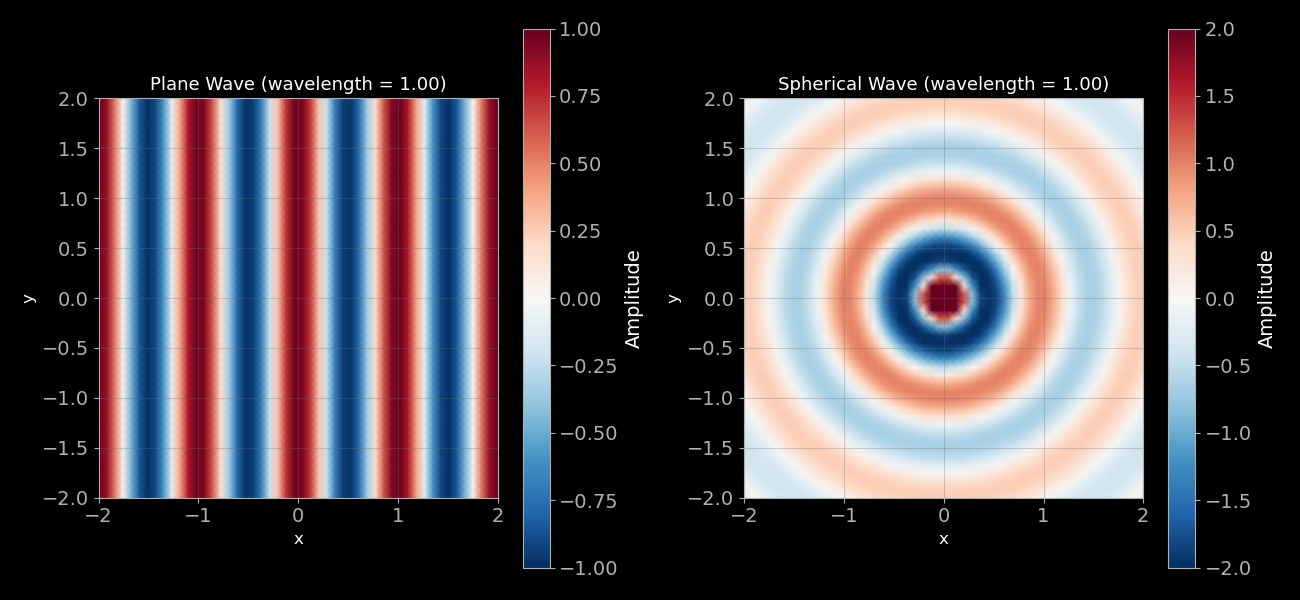

In [6]:
#| label: fig:spherical_waves_pcolormesh
#| "tags": [ "hide-input",]
# Create figure
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
colormap = 'RdBu_r'

# Create spatial grid
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

# Wave number
phase = 0
wavelength=1.0
k = 2 * np.pi / wavelength


# Plane wave
Z_plane = np.cos(k * X - phase)

# Spherical wave
R = np.sqrt(X**2 + Y**2)
R = np.where(R < 0.01, 0.01, R)
Z_spherical = np.cos(k * R - phase) / R

# Plane wave
im1 = axes[0].pcolormesh(X, Y, Z_plane, cmap=colormap, 
                         shading='gouraud', vmin=-1, vmax=1)
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title(f'Plane Wave (wavelength = {wavelength:.2f})', fontsize=13)
axes[0].set_aspect('equal')
axes[0].grid(True, alpha=0.3)
plt.colorbar(im1, ax=axes[0], label='Amplitude')

# Spherical wave
im2 = axes[1].pcolormesh(X, Y, Z_spherical, cmap=colormap, 
                         shading='gouraud', vmin=-2, vmax=2)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('y', fontsize=12)
axes[1].set_title(f'Spherical Wave (wavelength = {wavelength:.2f})', fontsize=13)
axes[1].set_aspect('equal')
axes[1].grid(True, alpha=0.3)
plt.colorbar(im2, ax=axes[1], label='Amplitude')

plt.tight_layout()
# plt.show()

def plot_both_waves(wavelength=1.0, phase=0.0, colormap='RdBu_r'):
    """
    Plot plane and spherical waves side by side.
    """    
    # Wave number
    new_k = 2 * np.pi / wavelength
    
    # Plane wave
    new_Z_plane = np.cos(new_k * X - phase)
    
    # Spherical wave
    new_Z_spherical = np.cos(new_k * R - phase) / R

    im1.set_array(new_Z_plane.ravel())
    im2.set_array(new_Z_spherical.ravel())

    fig.canvas.draw_idle()
    return

# Interactive widget for side-by-side comparison
interact(plot_both_waves,
         wavelength=FloatSlider(min=0.5, max=3.0, step=0.1, value=1.0,
                               description='Wavelength:',
                               continuous_update=True),
         phase=FloatSlider(min=0, max=2*np.pi, step=0.1, value=0.0,
                          description='Phase (rad):',
                          continuous_update=True),
         colormap=Dropdown(options=['RdBu_r', 'seismic', 'coolwarm', 'viridis', 'plasma'],
                          value='RdBu_r',
                          description='Colormap:'));
plt.show()

interactive(children=(FloatSlider(value=1.0, description='Wavelength:', max=3.0, min=0.5), FloatSlider(value=0…

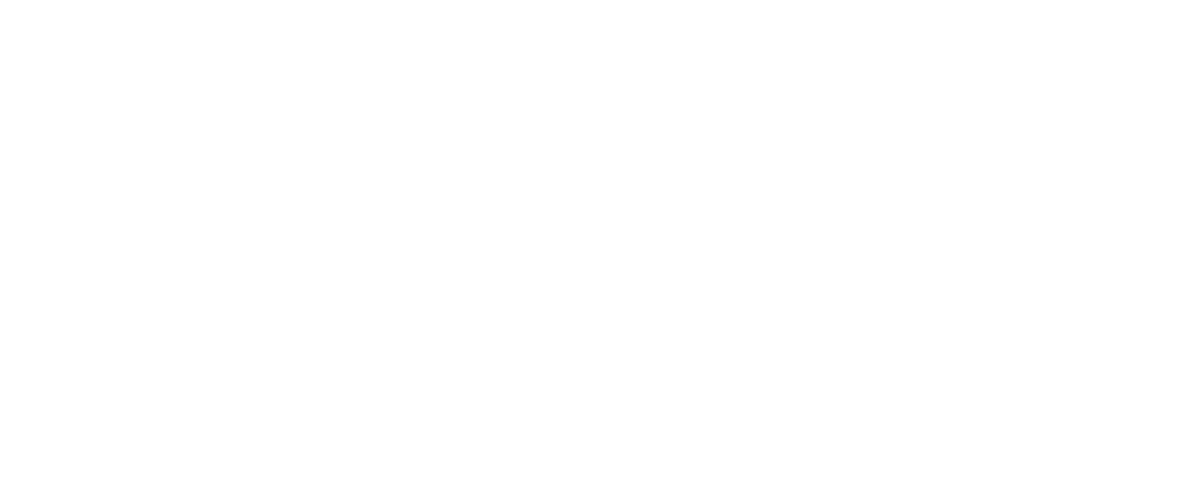

In [11]:
#| label: fig:spherical_waves_1d
#| "tags": [ "hide-input",]
fig = plt.figure(figsize=(12, 5))

# Create figure
x = np.linspace(0, 10, 500)
k = 2 * np.pi / wavelength

# Plane wave (constant amplitude)
plane = np.cos(k * x - phase)

# Spherical wave (1/r decay)
x_safe = np.where(x < 0.01, 0.01, x)
spherical = np.cos(k * x - phase) / x_safe

line1, = plt.plot(x, plane, color="#0165fc", linewidth=2, label='Plane Wave')
line2, = plt.plot(x, spherical, 'r-', linewidth=2, label='Spherical Wave (1/r decay)')
line3, = plt.plot(x, 1/x_safe, 'r--', alpha=0.5, linewidth=1, label='1/r envelope')
line4, = plt.plot(x, -1/x_safe, 'r--', alpha=0.5, linewidth=1)

plt.xlabel('Distance from source', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.title(f'Cross-Section Comparison (wavelength = {wavelength:.2f})', fontsize=13)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xlim(0, 6)
plt.ylim(-3, 3)
plt.tight_layout()


def plot_cross_section(wavelength=1.0, phase=0.0):
    """
    Plot 1D cross-sections of plane and spherical waves.
    """
    new_k = 2 * np.pi / wavelength
    
    # Plane wave (constant amplitude)
    new_plane = np.cos(new_k * x - phase)
    
    # Spherical wave (1/r decay)
    new_spherical = np.cos(new_k * x - phase) / x_safe
    
    line1.set_ydata(new_plane)
    line2.set_ydata(new_spherical)

    fig.canvas.draw_idle()

# Interactive cross-section plot
interact(plot_cross_section,
         wavelength=FloatSlider(min=0.5, max=3.0, step=0.1, value=1.0,
                               description='Wavelength:',
                               continuous_update=True),
         phase=FloatSlider(min=0, max=2*np.pi, step=0.1, value=0.0,
                          description='Phase (rad):',
                          continuous_update=True));
plt.show()

## <span style="color: #55ffff">Poynting Vectors</span>


### Quantum Mechanics: Photons
Light is famously made of *photons*, which act as the force carriers for the electromagnetic field in the standard model.  
A photon of light carries energy $E = h \nu$ 
